# Proyecto 2
## RSNA 2022 Cervical Spine Fracture Detection
**Universidad del Valle de Guatemala**\
**Facultad de Ingeniería**\
**Departamento de Ciencias de la Computación**\
**Data Science**

# Rendimiento del Modelo de Prediccion FINAL
---

## Integrantes
- Gustavo Gonzalez
- Pablo Orellana
- Diego Leiva
- Maria Ramirez

---


## Librerias

In [1]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Rendimiento

### Carga de datos

In [2]:
# Cargar los archivos CSV
train_data = pd.read_csv('data/train.csv')
predictions_data = pd.read_csv('predictions/train_patient_predictions.csv')

In [3]:
# Visualizar las primeras filas de ambos datasets
train_data.head()

,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7
0,1.2.826.0.1.3680043.6200,1,1,1,0,0,0,0,0
1,1.2.826.0.1.3680043.27262,1,0,1,0,0,0,0,0
2,1.2.826.0.1.3680043.21561,1,0,1,0,0,0,0,0
3,1.2.826.0.1.3680043.12351,0,0,0,0,0,0,0,0
4,1.2.826.0.1.3680043.1363,1,0,0,0,0,1,0,0


In [4]:
predictions_data.head()

,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7
0,1.2.826.0.1.3680043.10001,0.659799,0.016619,0.032367,0.022265,0.070120,0.173664,0.303744,0.316515
1,1.2.826.0.1.3680043.10005,0.573687,0.045943,0.206739,0.070035,0.031125,0.098427,0.162626,0.171899
2,1.2.826.0.1.3680043.10014,0.456891,0.040663,0.041848,0.049432,0.102014,0.083907,0.062477,0.194053
3,1.2.826.0.1.3680043.10016,0.246032,0.015621,0.016703,0.011127,0.007588,0.048375,0.061466,0.111296
4,1.2.826.0.1.3680043.10032,0.437186,0.046647,0.050965,0.015643,0.025782,0.049071,0.102950,0.239577


### Precision del Modelo

In [5]:
# Crear una lista para almacenar los resultados de accuracy por vértebra
accuracy_per_vertebra = {}

# Calcular el accuracy para cada vértebra de C1 a C7
for vertebra in ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']:
    # Fusionar los datos reales y de predicción para la vértebra específica
    merged_data_vertebra = pd.merge(
        train_data[['StudyInstanceUID', vertebra]],
        predictions_data[['StudyInstanceUID', vertebra]],
        on='StudyInstanceUID', suffixes=('_actual', '_pred')
    )
    # Aplicar el umbral de 0.6 para convertir las probabilidades en valores binarios (0 o 1)
    merged_data_vertebra[f'{vertebra}_pred'] = (merged_data_vertebra[f'{vertebra}_pred'] >= 0.6).astype(int)
    # Calcular el accuracy para la vértebra específica
    accuracy_per_vertebra[vertebra] = (merged_data_vertebra[f'{vertebra}_actual'] == merged_data_vertebra[f'{vertebra}_pred']).mean()

# Mostrar los resultados
for vertebra, accuracy in accuracy_per_vertebra.items():
    print(f'Accuracy para la vértebra {vertebra}: {accuracy * 100:.2f}%')

Accuracy para la vértebra C1: 93.06%
Accuracy para la vértebra C2: 87.36%
Accuracy para la vértebra C3: 96.38%
Accuracy para la vértebra C4: 94.65%
Accuracy para la vértebra C5: 91.92%
Accuracy para la vértebra C6: 86.82%
Accuracy para la vértebra C7: 81.02%


In [6]:
# Alinear ambos datasets por 'StudyInstanceUID' y dejar solo las columnas relevantes para el cálculo
merged_data = pd.merge(train_data[['StudyInstanceUID', 'patient_overall']],
                       predictions_data[['StudyInstanceUID', 'patient_overall']],
                       on='StudyInstanceUID', suffixes=('_actual', '_pred'))

# Aplicar el umbral de 0.6 para convertir las probabilidades en valores binarios (0 o 1)
merged_data['patient_overall_pred'] = (merged_data['patient_overall_pred'] >= 0.6).astype(int)

# Calcular la precisión (accuracy) comparando los valores de 'patient_overall_actual' y 'patient_overall_pred'
accuracy = (merged_data['patient_overall_actual'] == merged_data['patient_overall_pred']).mean()


print(f'Accuracy para deteccion de Fractura general: {accuracy*100:.2f}%')

Accuracy para deteccion de Fractura general: 67.34%


### Matriz de Confusion

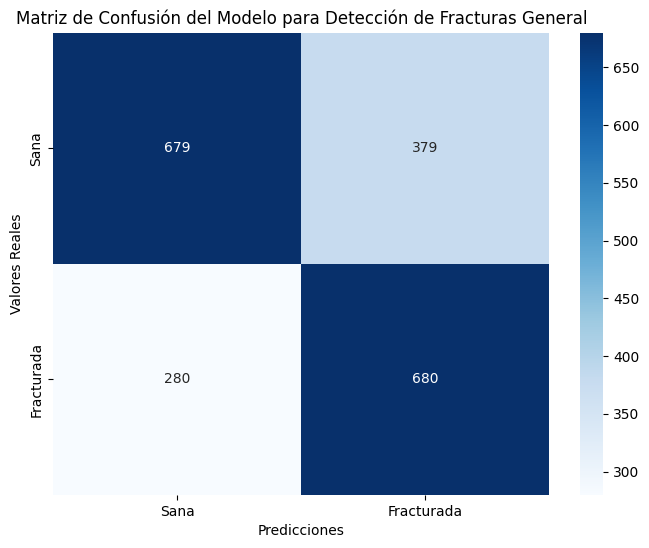

In [7]:
# Generar la matriz de confusión
conf_matrix = confusion_matrix(merged_data['patient_overall_actual'], merged_data['patient_overall_pred'])

# Crear el gráfico de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Sana', 'Fracturada'], yticklabels=['Sana', 'Fracturada'])
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión del Modelo para Detección de Fracturas General")
plt.show()

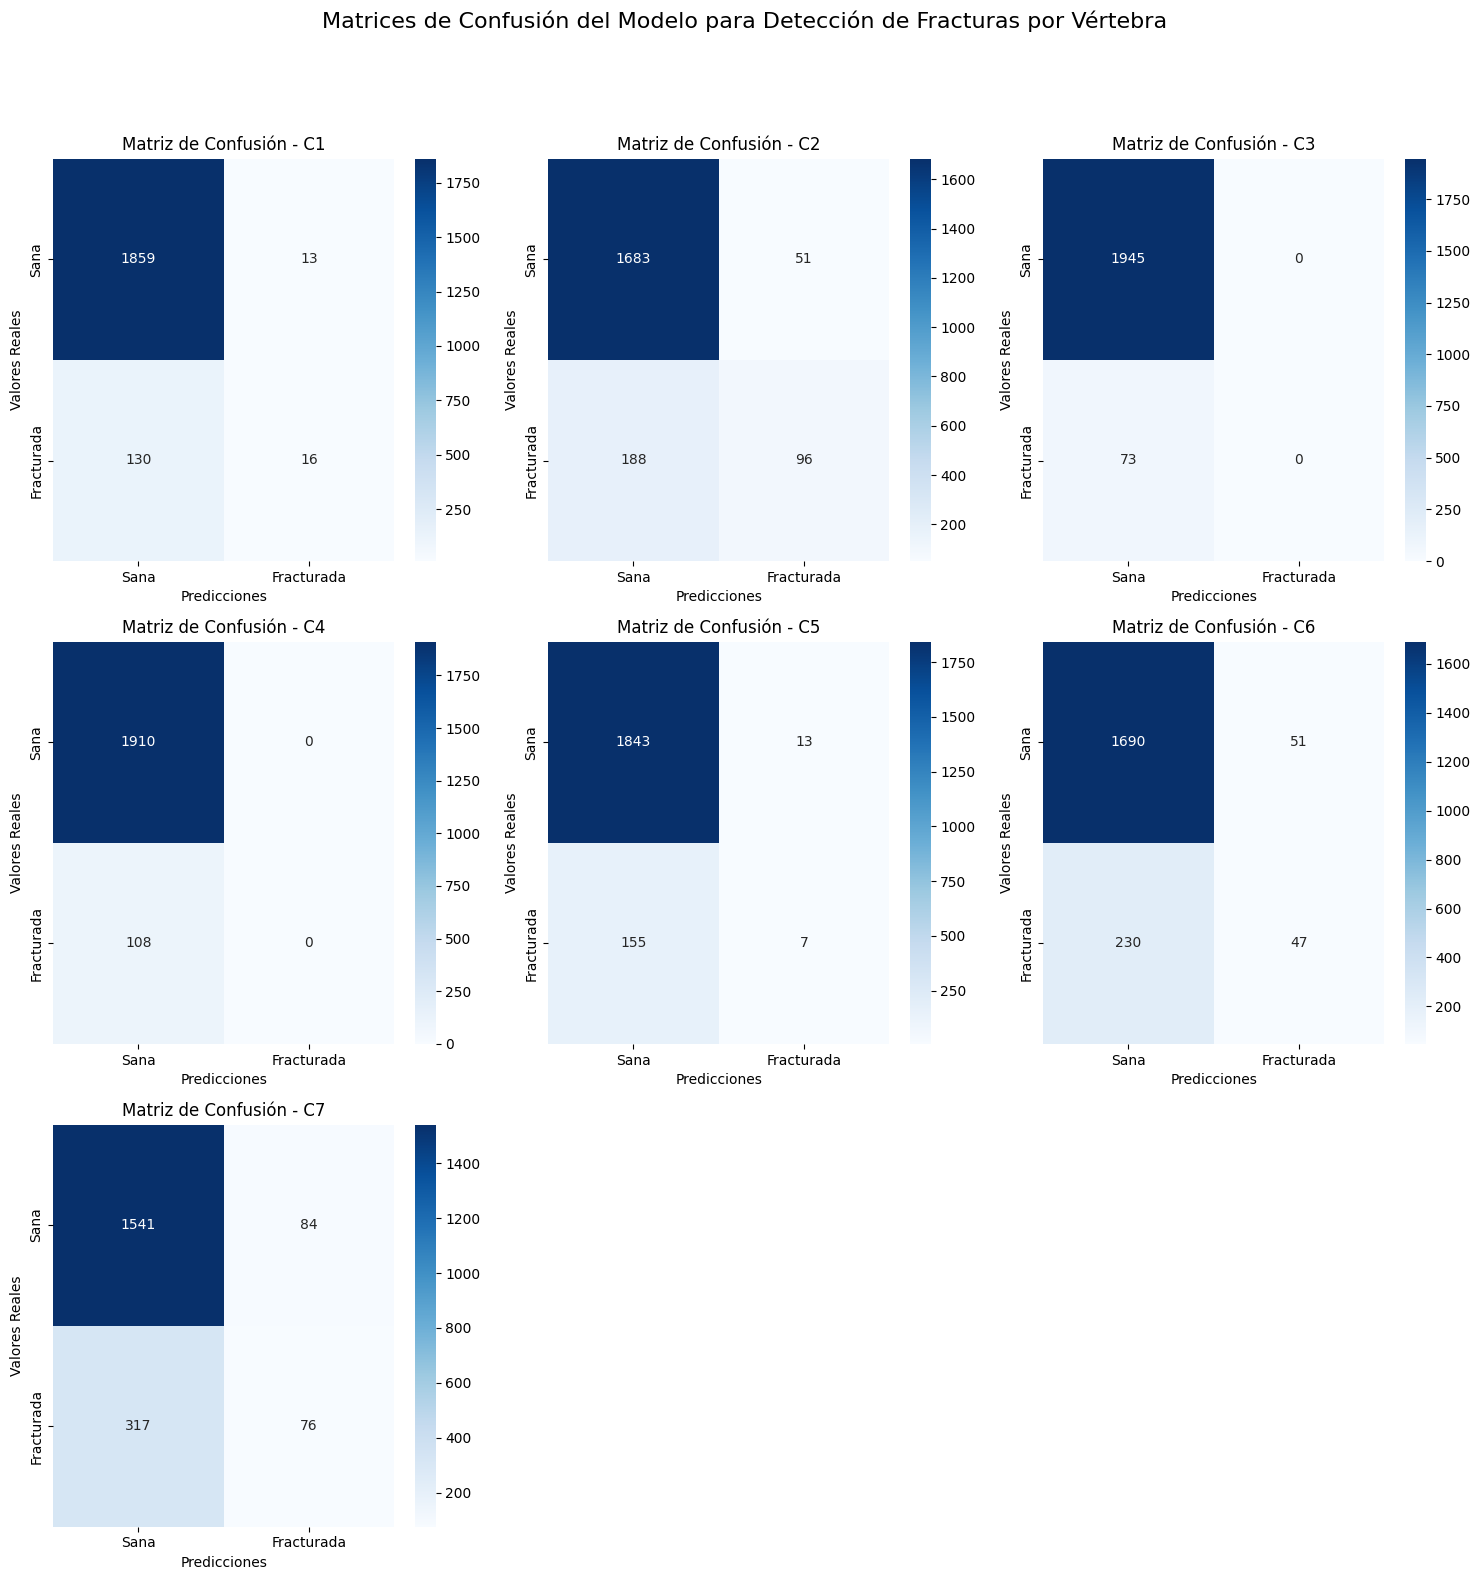

In [8]:
# Crear subplots para mostrar las matrices de confusión para cada vértebra
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # 3x3 grid for subplots

# Iterar sobre cada vértebra y generar la matriz de confusión
for i, vertebra in enumerate(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']):
    # Fusionar los datos reales y de predicción para la vértebra específica
    merged_data_vertebra = pd.merge(
        train_data[['StudyInstanceUID', vertebra]],
        predictions_data[['StudyInstanceUID', vertebra]],
        on='StudyInstanceUID', suffixes=('_actual', '_pred')
    )
    
    # Aplicar el umbral de 0.5 para convertir las probabilidades en valores binarios (0 o 1)
    merged_data_vertebra[f'{vertebra}_pred'] = (merged_data_vertebra[f'{vertebra}_pred'] >= 0.5).astype(int)
    
    # Calcular la matriz de confusión
    conf_matrix_vertebra = confusion_matrix(merged_data_vertebra[f'{vertebra}_actual'], merged_data_vertebra[f'{vertebra}_pred'])
    
    # Seleccionar el subplot adecuado
    ax = axes[i // 3, i % 3]
    
    # Dibujar la matriz de confusión en el subplot
    sns.heatmap(conf_matrix_vertebra, annot=True, fmt="d", cmap="Blues", 
                xticklabels=['Sana', 'Fracturada'], 
                yticklabels=['Sana', 'Fracturada'], ax=ax)
    
    # Títulos y etiquetas
    ax.set_title(f'Matriz de Confusión - {vertebra}')
    ax.set_xlabel("Predicciones")
    ax.set_ylabel("Valores Reales")

# Ocultar subplots adicionales en la última fila
axes[2, 1].axis('off')
axes[2, 2].axis('off')

# Añadir el título general sobre todos los gráficos
fig.suptitle("Matrices de Confusión del Modelo para Detección de Fracturas por Vértebra", fontsize=16, y=1.05)

plt.tight_layout()
plt.show()
